<a href="https://colab.research.google.com/github/rebeccahe1998/MachineLearning_CTR_project/blob/main/CTR_EDA_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As a result, click prediction systems are essential and widely used for sponsored search and real-time bidding.
- train - Training set. 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.
- test - Test set. 1 day of ads to for testing your model predictions. 
sampleSubmission.csv - Sample submission file in the correct format, corresponds to the All-0.5 Benchmark.
- Data fields
 - id: ad identifier
 - click: 0/1 for non-click/click
 - hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
 - C1 -- anonymized categorical variable
 - banner_pos
 - site_id
 - site_domain
 - site_category
 - app_id
 - app_domain
 - app_category
 - device_id
 - device_ip
 - device_model
 - device_type
 - device_conn_type
 - C14-C21 -- anonymized categorical variables

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sys.path.append('/content/drive/MyDrive/MLproject')
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/MLproject']

In [4]:
import gzip
myfile = "/content/drive/MyDrive/MLproject/train.gz"
with gzip.open(myfile, 'rb') as f:
    n_rows = len(f.readlines())

print (f'Exact number of rows: {n_rows}')


Exact number of rows: 2683788


In [7]:
def get_uncompressed_size(file):
    pipe_in = os.popen('gzip -l %s' % file)
    list_1 = pipe_in.readlines()
    list_2 = list_1[1].split()
    c , u , r , n = list_2
    return int(u)
get_uncompressed_size(file=myfile)

369010267

# EDA


---



In [8]:
import numpy as np
from numpy.core.fromnumeric import _all_dispatcher
import pandas as pd
import joblib
np.random.seed(2021)



# load only 20k data for get a glance
print('loading train.gz...')
# use only a subset of rows - you should use all rows eventually
df_train = pd.read_csv("/content/drive/MyDrive/MLproject/train.gz", compression='gzip', nrows=20000, header='infer')
y_train = df_train['click']


loading train.gz...


In [80]:
df_test = pd.read_csv("/content/drive/MyDrive/MLproject/test.gz", compression='gzip', nrows=20000, header='infer')

In [81]:
df_test

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,2683788,14102201,5,0,978ac369,7dec9eb9,9ccfa2ea,ecda2021,2021c8a9,07d7df22,a99f214a,04a7d14e,c1a17447,1,0,21694,201,31,2075,3,11,152,30
1,2683789,14102201,5,1,d410bf4e,dfe994f8,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,87c2966e,24f6b932,1,0,16858,201,31,1465,3,7,201,11
2,2683790,14102201,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,c45087c1,2203a096,1,0,21759,201,31,2080,0,3,84,209
3,2683791,14102201,5,1,e0db3d09,b30bad9c,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,20d99e91,0eb711ec,1,0,19950,201,31,1378,3,135,76,11
4,2683792,14102201,5,1,9b971c93,983b49d4,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,0672d4b1,6e1e2240,1,0,19950,201,31,1378,3,135,-1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2703783,14102201,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,0da3094e,f39b265e,1,0,21761,201,31,2080,0,3,-1,209
19996,2703784,14102201,5,0,50d76ac2,1c7daf87,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,8e8cf8bb,81b42528,1,0,17653,181,231,1572,2,7,-1,21
19997,2703785,14102201,5,0,b0c44dfd,76e3098b,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,0f6cdcec,f26c4c0e,1,0,19665,201,31,1831,2,271,-1,40
19998,2703786,14102201,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,610aa5cf,2203a096,1,0,21760,201,31,2080,0,3,-1,209


In [89]:
df_train

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,201,31,1300,0,3,-1,67
1,2,0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,201,31,1300,0,3,85,67
2,3,0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,201,31,1300,0,3,85,67
3,4,0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,201,31,1300,0,3,85,67
4,5,0,14102100,5,1,a2af7bee,cbee4b41,72722551,ecda2021,2021c8a9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,201,31,1739,0,3,-1,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,fd4045ce,3919eb94,1,0,15702,201,31,1300,0,3,-1,67
19996,19997,0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,f5fe9cc8,2203a096,1,0,15708,201,31,1300,0,3,85,67
19997,19998,0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,6bcbcc53,5db079b5,1,2,15708,201,31,1300,0,3,-1,67
19998,19999,0,14102100,5,0,c1b10167,78590e4e,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,e5025233,1aa0e912,1,0,15699,201,31,1300,0,3,-1,67


In [90]:
# discard some columns
unused_cols = ["id"]
df_train.drop(unused_cols, axis=1, inplace=True)

In [16]:
#since there is only ten days of data, we dont care about the year,month,day
def get_hour(date):
    h =date%100
    return h

In [92]:
df_train['hour'] = df_train.hour.apply(get_hour)
df_train

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,201,31,1300,0,3,-1,67
1,0,0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,201,31,1300,0,3,85,67
2,0,0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,201,31,1300,0,3,85,67
3,0,0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,201,31,1300,0,3,85,67
4,0,0,5,1,a2af7bee,cbee4b41,72722551,ecda2021,2021c8a9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,201,31,1739,0,3,-1,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,fd4045ce,3919eb94,1,0,15702,201,31,1300,0,3,-1,67
19996,0,0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,f5fe9cc8,2203a096,1,0,15708,201,31,1300,0,3,85,67
19997,0,0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,6bcbcc53,5db079b5,1,2,15708,201,31,1300,0,3,-1,67
19998,0,0,5,0,c1b10167,78590e4e,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,e5025233,1aa0e912,1,0,15699,201,31,1300,0,3,-1,67


Check imbalance class, variables counts
 - Click class is very imbalance
 - `device_id` is majority 'a99f214a'
 - 

In [ ]:
dif_type = []
for i in df_train.columns:
    print(df_train[i].value_counts())
    dif_type.append((i,len(df_train[i].value_counts())))

dif_type

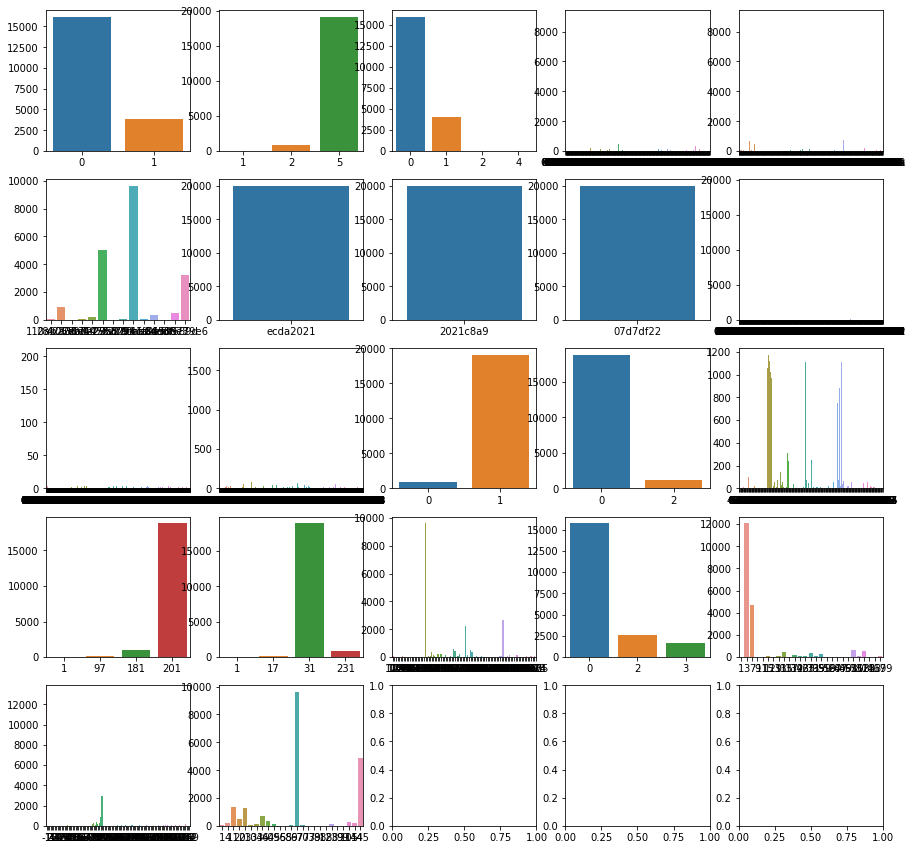

In [ ]:
fig, ax_list = plt.subplots(5,5,figsize=(15, 15) )
cols = ['click', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
for col,ax in zip(cols,ax_list.flatten()):
    x, y = np.unique(df_train[col],return_counts =True)
    sns.barplot(ax=ax,x=x,y=y)

In [94]:
df_train.columns

Index(['click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [ ]:
df_train.info() # there is none empty entry for the subset

In [96]:
df_train.describe() # mean of click is 0.19

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,0.193600,0.0,4.865350,0.204450,0.955450,0.120400,17405.293000,198.97740,39.326400,1508.667150,0.509700,86.08360,32.212750,76.842850
std,0.395129,0.0,0.621964,0.404918,0.206319,0.475726,2497.192019,11.26223,40.333445,308.953229,1.005662,240.16718,52.410809,44.394368
min,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,4687.000000,1.00000,1.000000,1.000000,0.000000,1.00000,-1.000000,1.000000
25%,0.000000,0.0,5.000000,0.000000,1.000000,0.000000,15704.000000,201.00000,31.000000,1300.000000,0.000000,3.00000,-1.000000,67.000000
50%,0.000000,0.0,5.000000,0.000000,1.000000,0.000000,16071.000000,201.00000,31.000000,1358.000000,0.000000,3.00000,-1.000000,67.000000
75%,0.000000,0.0,5.000000,0.000000,1.000000,0.000000,19950.000000,201.00000,31.000000,1739.000000,0.000000,7.00000,84.000000,144.000000
max,1.000000,0.0,5.000000,4.000000,1.000000,2.000000,21705.000000,201.00000,231.000000,2075.000000,3.000000,1679.00000,249.000000,145.000000


In [97]:
# transform the features with more than 13 value count 
to_trans_features = []

for fea,count in dif_type:
    if count > 13:
        to_trans_features.append(fea)
to_trans_features

['site_id',
 'site_domain',
 'site_category',
 'device_id',
 'device_ip',
 'device_model',
 'C14',
 'C17',
 'C19',
 'C20',
 'C21']

In [28]:
def obj_clean(X,i):
    '''
    Input: data frame type of a column in the original dataframe
    Ouput: transformed column
    '''

    def get_click_rate(val):
        # get click rate of each unique value
        temp = df_train[ df_train[i] == val]
        res = (temp.click.sum() / temp.click.count())
        return res

    def get_type(V, str):
        # input V: 
        describe_df = df_train.describe()
        mean_click = describe_df.loc['mean','click']
        very_high = mean_click + 0.04
        higher = mean_click + 0.02
        lower = mean_click - 0.02
        very_low = mean_click - 0.04

        vh_type = V[V[str] > very_high].index.tolist()
        hr_type = V[(V[str] > higher) & (V[str] < very_high)].index.tolist()
        vl_type = V[V[str] < very_low].index.tolist()
        lr_type = V[(V[str] < lower) & (V[str] > very_low)].index.tolist()

        return vh_type, hr_type, vl_type, lr_type

    def clean_function(x):
        while x in type_[0]:
            return 'very_high'
        while x in type_[1]:
            return 'higher'
        while x in type_[2]:
            return 'very_low'
        while x in type_[3]:
            return 'lower'
        return 'mid'
    # create a frequency data frame
    fq = pd.DataFrame(X[X.columns[0]].value_counts())
    if len(fq) > 1000:
        fq = fq[:1000]
    fq['val'] = fq.index

    #fq['freq'] = fq[i]
    fq['click_rate'] = fq.val.apply(get_click_rate)
    type_ = get_type(fq, 'click_rate')

    return X[i].apply(clean_function)
'''
for i in to_trans_features:    
    df_train[[i]] = obj_clean(df_train[[i]],i)

'''

'\nfor i in to_trans_features:    \n    df_train[[i]] = obj_clean(df_train[[i]],i)\n\n'

In [100]:
df_train

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,0,5,0,mid,mid,mid,ecda2021,2021c8a9,07d7df22,mid,higher,very_low,1,2,very_low,201,31,mid,0,mid,mid,mid
1,0,0,5,0,mid,mid,mid,ecda2021,2021c8a9,07d7df22,mid,very_low,higher,1,0,mid,201,31,mid,0,mid,very_high,mid
2,0,0,5,0,mid,mid,mid,ecda2021,2021c8a9,07d7df22,mid,very_low,very_low,1,0,mid,201,31,mid,0,mid,very_high,mid
3,0,0,5,0,mid,mid,mid,ecda2021,2021c8a9,07d7df22,mid,very_low,very_high,1,0,very_low,201,31,mid,0,mid,very_high,mid
4,0,0,5,1,very_low,very_low,very_low,ecda2021,2021c8a9,07d7df22,mid,very_low,higher,1,0,very_low,201,31,very_low,0,mid,mid,very_low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,5,0,mid,mid,mid,ecda2021,2021c8a9,07d7df22,mid,very_low,lower,1,0,lower,201,31,mid,0,mid,mid,mid
19996,0,0,5,0,mid,mid,mid,ecda2021,2021c8a9,07d7df22,mid,very_low,higher,1,0,higher,201,31,mid,0,mid,very_high,mid
19997,0,0,5,0,mid,mid,mid,ecda2021,2021c8a9,07d7df22,mid,very_low,very_high,1,2,higher,201,31,mid,0,mid,mid,mid
19998,0,0,5,0,very_high,very_high,mid,ecda2021,2021c8a9,07d7df22,mid,very_low,very_high,1,0,mid,201,31,mid,0,mid,mid,mid


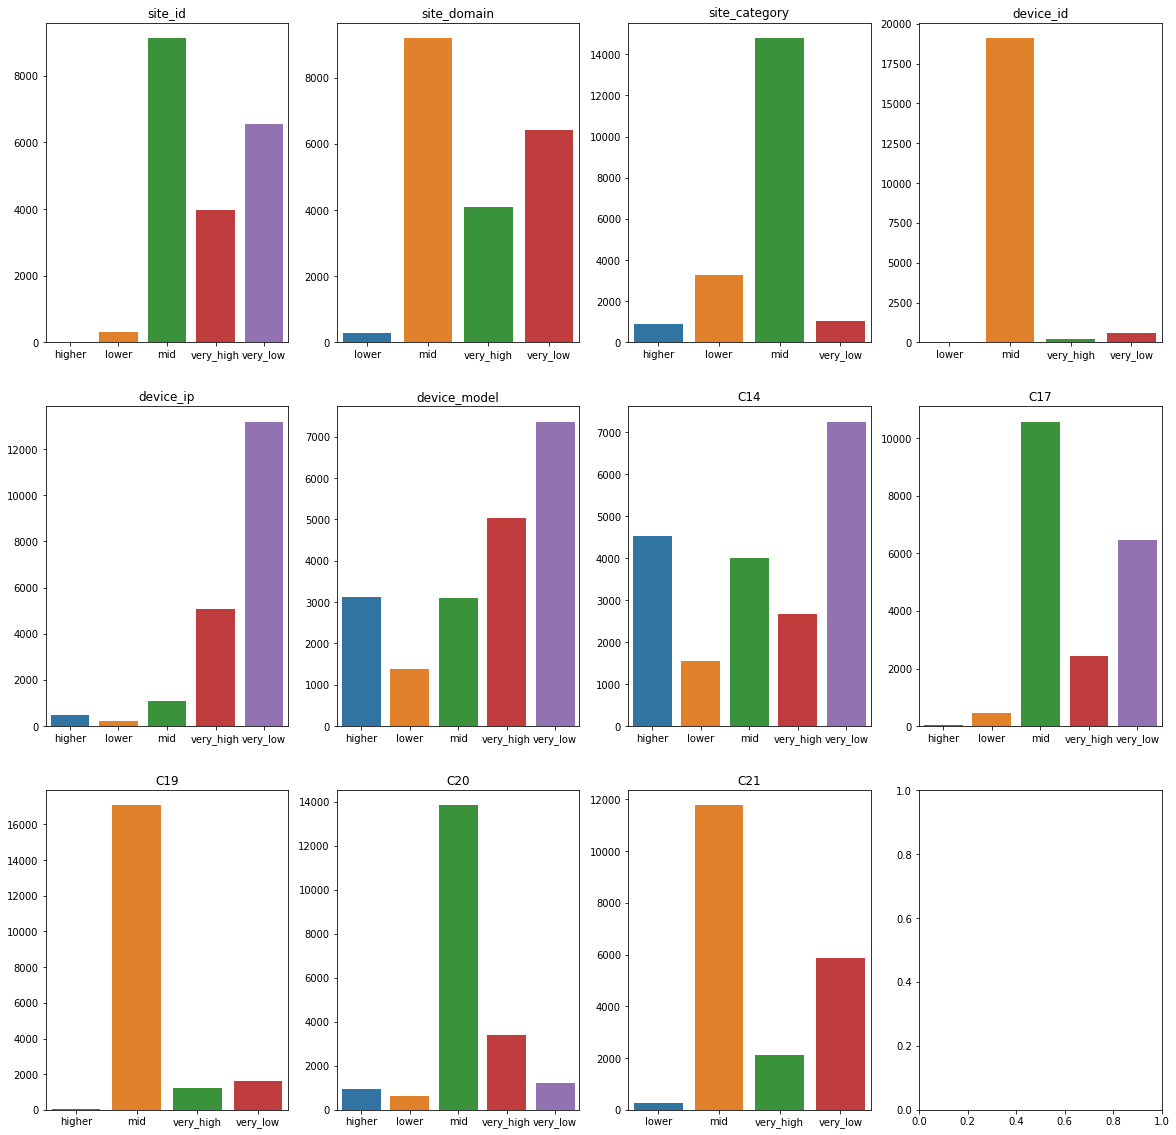

In [101]:
# plot again 
fig, ax_list = plt.subplots(3,4,figsize=(20, 20) )
cols = to_trans_features
for col,ax in zip(cols,ax_list.flatten()):
    x, y = np.unique(df_train[col],return_counts =True)
    sns.barplot(ax=ax,x=x,y=y)
    ax.set_title(col)

In [102]:
# device id looks like it only has majority one value, maybe we can drop it.
df_with_id = df_train.copy(deep=True)



In [103]:
df_train= df_train.drop(['device_id'],axis=1)


In [10]:
from sklearn.preprocessing import LabelEncoder

In [105]:
def lab_econ(df):
    le = LabelEncoder()
    le_count = 0
    object_fea = df_train.columns[df_train.dtypes==object]
    for fea in object_fea:
        if len(list(df_train[fea].unique()))<=2:
            le.fit(df_train[fea])
            df_train[fea] = le.transform(df[fea])
            le_count +=1
lab_econ(df_train)


In [106]:
df_train = pd.get_dummies(df_train)
df_train

,click,hour,C1,banner_pos,app_id,app_domain,app_category,device_type,device_conn_type,C15,C16,C18,site_id_higher,site_id_lower,site_id_mid,site_id_very_high,site_id_very_low,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C17_higher,C17_lower,C17_mid,C17_very_high,C17_very_low,C19_higher,C19_mid,C19_very_high,C19_very_low,C20_higher,C20_lower,C20_mid,C20_very_high,C20_very_low,C21_lower,C21_mid,C21_very_high,C21_very_low
0,0,0,5,0,0,0,0,1,2,201,31,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,0,0,5,0,0,0,0,1,0,201,31,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,0,5,0,0,0,0,1,0,201,31,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,0,0,5,0,0,0,0,1,0,201,31,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,0,0,5,1,0,0,0,1,0,201,31,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,5,0,0,0,0,1,0,201,31,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
19996,0,0,5,0,0,0,0,1,0,201,31,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
19997,0,0,5,0,0,0,0,1,2,201,31,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
19998,0,0,5,0,0,0,0,1,0,201,31,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [107]:
corr = df_train.corr()['click'].sort_values()
print('Most Positive Correlations:\n', corr.tail(15))
print('\nMost Negative Correlations:\n', corr.head(15))

Most Positive Correlations:
 C18                       0.126394
C16                       0.146442
C19_very_high             0.174325
device_model_very_high    0.199230
C21_very_high             0.219572
C17_very_high             0.238907
C14_very_high             0.241585
site_domain_very_high     0.245883
site_id_very_high         0.258257
device_ip_very_high       0.708463
click                     1.000000
hour                           NaN
app_id                         NaN
app_domain                     NaN
app_category                   NaN
Name: click, dtype: float64

Most Negative Correlations:
 device_ip_very_low       -0.653720
site_id_very_low         -0.239838
site_domain_very_low     -0.233168
device_model_very_low    -0.203646
C14_very_low             -0.201182
C17_very_low             -0.185229
C21_very_low             -0.171162
site_category_very_low   -0.076150
C19_mid                  -0.075421
C20_very_low             -0.064127
C15                      -0.061851
C19

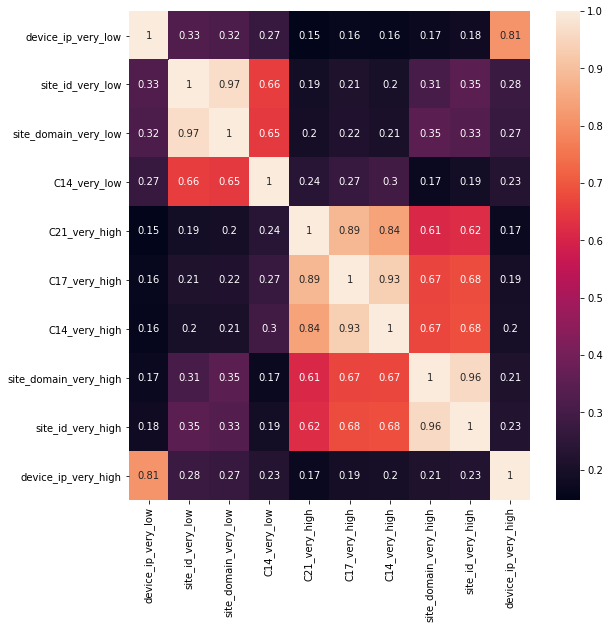

In [110]:
corr_high = ['device_ip_very_low','site_id_very_low','site_domain_very_low','C14_very_low',
             'C21_very_high','C17_very_high','C14_very_high','site_domain_very_high','site_id_very_high','device_ip_very_high']

df_corr = df_train[corr_high]
plt.figure(figsize=(9, 9))
sns.heatmap(df_corr.corr().abs(), annot=True)
plt.show()            

In [11]:
df_train = pd.read_csv("/content/drive/MyDrive/MLproject/train.gz", compression='gzip', header='infer')
y_train = df_train['click']


In [12]:
df_test = pd.read_csv("/content/drive/MyDrive/MLproject/test.gz", compression='gzip', header='infer')
df_test

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,2683788,14102201,5,0,978ac369,7dec9eb9,9ccfa2ea,ecda2021,2021c8a9,07d7df22,a99f214a,04a7d14e,c1a17447,1,0,21694,201,31,2075,3,11,152,30
1,2683789,14102201,5,1,d410bf4e,dfe994f8,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,87c2966e,24f6b932,1,0,16858,201,31,1465,3,7,201,11
2,2683790,14102201,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,c45087c1,2203a096,1,0,21759,201,31,2080,0,3,84,209
3,2683791,14102201,5,1,e0db3d09,b30bad9c,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,20d99e91,0eb711ec,1,0,19950,201,31,1378,3,135,76,11
4,2683792,14102201,5,1,9b971c93,983b49d4,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,0672d4b1,6e1e2240,1,0,19950,201,31,1378,3,135,-1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473605,3157393,14102205,5,0,8cbf056b,85c6289a,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,aebfe43b,6e1e2240,1,0,8330,201,31,339,3,143,78,11
473606,3157394,14102205,5,1,248ed81a,7fb09894,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,b54e10fc,8a4875bd,1,0,6616,201,31,154,2,3,131,20
473607,3157395,14102205,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b9966c35,d787e91b,1,0,21763,201,31,2080,0,3,85,209
473608,3157396,14102205,5,1,1b84e3e3,2064e137,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,3baf3dcb,8b1aa260,1,0,15705,201,31,1300,0,3,-1,67


In [13]:
# process the full dataset like above
# discard some columns
unused_cols = ["id"]

df_full = pd.concat([df_train,df_test],axis=0)

df_full.drop(unused_cols, axis=1, inplace=True)


In [14]:
df_full

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0.0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,201,31,1300,0,3,-1,67
1,0.0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,201,31,1300,0,3,85,67
2,0.0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,201,31,1300,0,3,85,67
3,0.0,14102100,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,201,31,1300,0,3,85,67
4,0.0,14102100,5,1,a2af7bee,cbee4b41,72722551,ecda2021,2021c8a9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,201,31,1739,0,3,-1,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473605,NaN,14102205,5,0,8cbf056b,85c6289a,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,aebfe43b,6e1e2240,1,0,8330,201,31,339,3,143,78,11
473606,NaN,14102205,5,1,248ed81a,7fb09894,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,b54e10fc,8a4875bd,1,0,6616,201,31,154,2,3,131,20
473607,NaN,14102205,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b9966c35,d787e91b,1,0,21763,201,31,2080,0,3,85,209
473608,NaN,14102205,5,1,1b84e3e3,2064e137,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,3baf3dcb,8b1aa260,1,0,15705,201,31,1300,0,3,-1,67


In [17]:
df_full['hour'] = df_full.hour.apply(get_hour)


In [29]:
dif_type = []
for i in df_full.columns:
    #print(df_full[i].value_counts())
    dif_type.append((i,len(df_full[i].value_counts())))

In [30]:
dif_type

[('click', 2),
 ('C1', 5),
 ('banner_pos', 5),
 ('site_id', 1),
 ('site_domain', 3668),
 ('site_category', 22),
 ('app_id', 1),
 ('app_domain', 1),
 ('app_category', 1),
 ('device_id', 102297),
 ('device_ip', 792002),
 ('device_model', 4964),
 ('device_type', 4),
 ('device_conn_type', 2),
 ('C14', 606),
 ('C15', 5),
 ('C16', 6),
 ('C17', 153),
 ('C18', 4),
 ('C19', 33),
 ('C20', 166),
 ('C21', 35),
 ('hour_bin', 11)]

In [174]:
print(df_full['hour'].value_counts())

5     324162
4     302022
3     219031
2     194573
1     167769
6     154444
9     144038
0     140117
8     138608
7     138027
10    129047
11    121278
13    120884
15    113179
14    112181
16    109462
17    107257
12     98637
18     88519
19     61142
20     47767
22     44749
21     41404
23     39100
Name: hour, dtype: int64


In [19]:
df_full['hour_bin'] = pd.cut(df_full['hour'], bins = np.linspace(-0.0001, 24, num =12)) # bin the hour data


In [20]:
df_hour_bin = df_full[['hour_bin','click']][0:df_train.shape[0]].groupby('hour_bin').mean()
df_hour_bin

,click
hour_bin,
"(-0.0001, 2.182]",0.202295
"(2.182, 4.364]",0.189007
"(4.364, 6.545]",0.190164
"(6.545, 8.727]",0.196497
"(8.727, 10.909]",0.195672
"(10.909, 13.091]",0.220497
"(13.091, 15.273]",0.222284
"(15.273, 17.455]",0.207098
"(17.455, 19.636]",0.191092


Text(0, 0.5, 'Click rate')

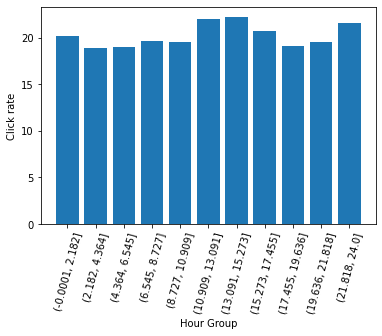

In [21]:
plt.bar(df_hour_bin.index.astype(str), 100* df_hour_bin['click']) # no significant disinction
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Hour Group'); plt.ylabel('Click rate')


In [22]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #along column(add new column)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending, excluding featurs w/o missing value
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(  #sort by pd[column]
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(df_full)

Your selected dataframe has 24 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
click,473610,15.0


In [23]:
df_full = df_full.drop(['hour'], axis=1)
df_full

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_bin
0,0.0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,201,31,1300,0,3,-1,67,"(-0.0001, 2.182]"
1,0.0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,201,31,1300,0,3,85,67,"(-0.0001, 2.182]"
2,0.0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,201,31,1300,0,3,85,67,"(-0.0001, 2.182]"
3,0.0,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,201,31,1300,0,3,85,67,"(-0.0001, 2.182]"
4,0.0,5,1,a2af7bee,cbee4b41,72722551,ecda2021,2021c8a9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,201,31,1739,0,3,-1,145,"(-0.0001, 2.182]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473605,NaN,5,0,8cbf056b,85c6289a,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,aebfe43b,6e1e2240,1,0,8330,201,31,339,3,143,78,11,"(4.364, 6.545]"
473606,NaN,5,1,248ed81a,7fb09894,74073276,ecda2021,2021c8a9,07d7df22,a99f214a,b54e10fc,8a4875bd,1,0,6616,201,31,154,2,3,131,20,"(4.364, 6.545]"
473607,NaN,5,0,078d3465,dd641cc7,8fd0aea4,ecda2021,2021c8a9,07d7df22,a99f214a,b9966c35,d787e91b,1,0,21763,201,31,2080,0,3,85,209,"(4.364, 6.545]"
473608,NaN,5,1,1b84e3e3,2064e137,f66779e6,ecda2021,2021c8a9,07d7df22,a99f214a,3baf3dcb,8b1aa260,1,0,15705,201,31,1300,0,3,-1,67,"(4.364, 6.545]"


In [31]:
dif_type = []
for i in df_full.columns:
    dif_type.append((i,len(df_full[i].value_counts())))
# transform the features with more than 13 value count 
to_trans_features = []

for fea,count in dif_type:
    if count > 13:
        to_trans_features.append(fea)
to_trans_features


['site_domain',
 'site_category',
 'device_id',
 'device_ip',
 'device_model',
 'C14',
 'C17',
 'C19',
 'C20',
 'C21']

In [32]:
for i in to_trans_features:    
    df_full[[i]] = obj_clean(df_full[[i]],i)
    #10+mins
    

In [34]:
df_full.to_csv('/content/drive/MyDrive/MLproject/df_Full_processed.csv') # 0.4gb

In [37]:
df_full = pd.get_dummies(df_full)
df_full

,click,C1,banner_pos,device_type,device_conn_type,C15,C16,C18,site_id_mid,site_domain_higher,site_domain_lower,site_domain_mid,site_domain_very_high,site_domain_very_low,site_category_higher,site_category_lower,site_category_mid,site_category_very_high,site_category_very_low,app_id_ecda2021,app_domain_2021c8a9,app_category_07d7df22,device_id_higher,device_id_lower,device_id_mid,device_id_very_high,device_id_very_low,device_ip_higher,device_ip_lower,device_ip_mid,device_ip_very_high,device_ip_very_low,device_model_higher,device_model_lower,device_model_mid,device_model_very_high,device_model_very_low,C14_higher,C14_lower,C14_mid,C14_very_high,C14_very_low,C17_higher,C17_lower,C17_mid,C17_very_high,C17_very_low,C19_higher,C19_lower,C19_mid,C19_very_high,C19_very_low,C20_higher,C20_lower,C20_mid,C20_very_high,C20_very_low,C21_lower,C21_mid,C21_very_high,C21_very_low,"hour_bin_(-0.0001, 2.182]","hour_bin_(2.182, 4.364]","hour_bin_(4.364, 6.545]","hour_bin_(6.545, 8.727]","hour_bin_(8.727, 10.909]","hour_bin_(10.909, 13.091]","hour_bin_(13.091, 15.273]","hour_bin_(15.273, 17.455]","hour_bin_(17.455, 19.636]","hour_bin_(19.636, 21.818]","hour_bin_(21.818, 24.0]"
0,0.0,5,0,1,2,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,5,1,1,0,201,31,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473605,NaN,5,0,1,0,201,31,3,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
473606,NaN,5,1,1,0,201,31,2,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
473607,NaN,5,0,1,0,201,31,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
473608,NaN,5,1,1,0,201,31,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [38]:
# now seperate the training and testing set
train = df_full[:df_train.shape[0]]
test = df_full[df_train.shape[0]:]
train.shape

(2683787, 72)

In [39]:
train.to_csv('/content/drive/MyDrive/MLproject/train_processed.csv')
test.to_csv('/content/drive/MyDrive/MLproject/test_processed.csv')

In [ ]:
# embedding (all features are categorical)
print('embedding...')
from sklearn.feature_extraction import DictVectorizer
import pickle

try:
    with open('X_train_dict.pkl', 'rb') as ff:
        X_train_dict = pickle.load(ff)
    vectorizer = joblib.load('vectorizer.joblib')
    X_train = vectorizer.transform(X_train_dict)
    print('saved vectorizer loaded & applied to training set')
except:
    X_train_dict = list(df_train.drop('click', axis=1).T.to_dict().values())
    with open('X_train_dict.pkl', 'wb') as ff:
        pickle.dump(X_train_dict, ff)
    vectorizer = DictVectorizer(sparse=True)
    X_train = vectorizer.fit_transform(X_train_dict) # can only see training dataset
    joblib.dump(vectorizer, 'vectorizer.joblib')
    print('imported data & built a vectorizer on the training set')

n, d = X_train.shape
print("n = {}, d = {}".format(n, d))



embedding...
imported data & built a vectorizer on the training set
n = 20000, d = 14079


In [ ]:
X_train[0:10,0:5]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [ ]:
# train
from sklearn.linear_model import LogisticRegression
print('fit a simple logistic regression with l1 regularization...')
clf = LogisticRegression(max_iter=20000, penalty='l1', solver='liblinear', C=1)
clf.fit(X_train, y_train)
print('...done training')

##########################################################
######### testing code ###################################

# transform test data as well
print('loading and transforming test data...')
df_test = pd.read_csv("test.gz", compression='gzip', header='infer')
# df_test.set_index('id', inplace=True)
unused_cols = ['site_id', 'app_id']
df_test.drop(unused_cols, axis=1, inplace=True)

try:
    with open('X_test_dict.pkl', 'rb') as ff:
        X_test_dict = pickle.load('ff')
except:
    X_test_dict = list(df_test.T.to_dict().values())
    with open('X_test_dict.pkl', 'wb') as ff:
        pickle.dump(X_test_dict, ff)

X_test = vectorizer.transform(X_test_dict)

print('predicting and output to csv...')
ctr_pred = clf.predict_proba(X_test)[:, 1]
# save output: every line is (id, ctr_pred)
all_id = df_test['id']
df_out = pd.DataFrame({'id': all_id, 'ctr': ctr_pred})
df_out.to_csv('Submission.csv', index=False)

print('...done')